In [1]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
# To convert to categorical data
from tensorflow.keras.utils import to_categorical
#libraries for building model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout,Flatten
from tensorflow.keras.datasets import cifar10

D:\Users\sf41\Anaconda3\envs\tensorflow_env\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 286s 2us/step


In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

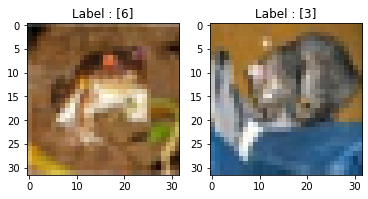

In [5]:
plt.subplot(121)
plt.imshow(X_train[0])
plt.title("Label : {}".format(y_train[0]))
#first image of test data
plt.subplot(122)
plt.imshow(X_test[0])
plt.title("Label : {}".format(y_test[0]));

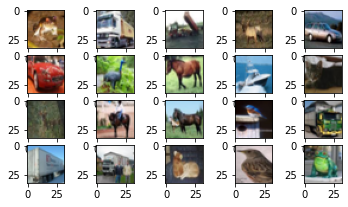

In [6]:
for i in range(20):
    #subplot
    plt.subplot(5, 5, i+1)
    # plotting pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [7]:
X_train = X_train/255
X_test = X_test/255
print(X_train)

[[[[0.23137255 0.24313725 0.24705882]
   [0.16862745 0.18039216 0.17647059]
   [0.19607843 0.18823529 0.16862745]
   ...
   [0.61960784 0.51764706 0.42352941]
   [0.59607843 0.49019608 0.4       ]
   [0.58039216 0.48627451 0.40392157]]

  [[0.0627451  0.07843137 0.07843137]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509804 0.21568627]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117647 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215686 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941176 0.19607843]
   [0.47058824 0.32941176 0.19607843]
   [0.42745098 0.28627451 0.16470588]]

  ...

  [[0.81568627 0.66666667 0.37647059]
   [0.78823529 0.6        0.13333333]
   [0.77647059 0.63137255 0.10196078]
   ...
   [0.62745098 0.52156863 0.2745098 ]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333333 0.07843137]]

  [[0.70588235 0.54509804 0.37647059]
   [0.6

In [8]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [42]:
model=Sequential()
#adding the first Convolution layer
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)))
#adding Max pooling layer
model.add(MaxPool2D(2,2))
#adding another Convolution layer
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
#adding dense layer
model.add(Dense(216,activation='relu'))
#adding output layer
model.add(Dense(10,activation='softmax'))

In [38]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
history=model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.4071 - accuracy: 0.4991
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.0272 - accuracy: 0.6418
Epoch 3/10
1563/1563 [==============================] - 34s 21ms/step - loss: 0.8739 - accuracy: 0.6978
Epoch 4/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.7622 - accuracy: 0.7404
Epoch 5/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.6656 - accuracy: 0.7736
Epoch 6/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.5813 - accuracy: 0.8026
Epoch 7/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.5031 - accuracy: 0.8280
Epoch 8/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.4429 - accuracy: 0.8511
Epoch 9/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.3895 - accuracy: 0.8699
Epoch 10/10
1563/1563 [==============================] - 33s 21m

In [12]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 1.1878 - accuracy: 0.6995


[1.1878306865692139, 0.6995000243186951]

In [13]:
pred=model.predict(X_test)
#printing the first element from predicted data
print(pred[0])
#printing the index of 
print('Index:',np.argmax(pred[0]))

[1.7801628e-03 1.6827139e-04 1.5815785e-03 4.4688505e-01 1.3593934e-05
 4.5499450e-01 9.4410390e-02 1.0339787e-05 1.5202901e-04 4.1184408e-06]
Index: 5


In [14]:
y_classes = [np.argmax(element) for element in pred]
print('Predicted_values:',y_classes[:10])
print('Actual_values:',y_test[:10])

Predicted_values: [5, 1, 8, 0, 6, 6, 1, 6, 7, 1]
Actual_values: [3 8 8 0 6 6 1 6 3 1]


In [29]:
model4=Sequential()
#adding the first Convolution layer
model4.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
#adding Max pooling layer
model4.add(MaxPool2D(2,2))
#adding dropout
model4.add(Dropout(0.2))
#adding another Convolution layer
model4.add(Conv2D(64,(3,3),activation='relu'))
model4.add(MaxPool2D(2,2))
#adding dropout
model4.add(Dropout(0.2))
model4.add(Flatten())
#adding dense layer
model4.add(Dense(216,activation='relu'))
#adding dropout
model4.add(Dropout(0.2))
#adding output layer
model4.add(Dense(10,activation='softmax'))
model4.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model4.fit(X_train,y_train,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 33s 20ms/step - loss: 1.4861 - accuracy: 0.4606
Epoch 2/15
1563/1563 [==============================] - 32s 20ms/step - loss: 1.1477 - accuracy: 0.5933
Epoch 3/15
1563/1563 [==============================] - 31s 20ms/step - loss: 1.0238 - accuracy: 0.6404
Epoch 4/15
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9348 - accuracy: 0.6722
Epoch 5/15
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8597 - accuracy: 0.6983
Epoch 6/15
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8124 - accuracy: 0.7151
Epoch 7/15
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7691 - accuracy: 0.7302
Epoch 8/15
1563/1563 [==============================] - 32s 20ms/step - loss: 0.7284 - accuracy: 0.7409
Epoch 9/15
1563/1563 [==============================] - 32s 21ms/step - loss: 0.6886 - accuracy: 0.7527
Epoch 10/15
1563/1563 [==============================] - 33s 21m

In [16]:
model4.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.8569 - accuracy: 0.7114


[0.8569034934043884, 0.7113999724388123]

Text(0.5, 1.0, 'Training and Validation')

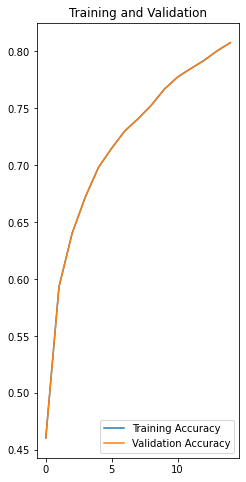

In [32]:
acc = history.history['accuracy']
val_acc = history.history['accuracy']

loss = history.history['loss']
val_loss = history.history['loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation')